<a href="https://colab.research.google.com/github/Himadri2003176/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/twitter-sentiment-dataset")

print("Path to dataset files:", path)

100%|██████████| 7.60M/7.60M [00:00<00:00, 159MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/saurabhshahane/twitter-sentiment-dataset/versions/1


In [ ]:
# one-time installs (run in a cell)
!pip install pandas scikit-learn matplotlib seaborn joblib vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
import os

print(os.listdir(path))

['Twitter_Data.csv']


In [ ]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
df = pd.read_csv(os.path.join(path, "Twitter_Data.csv"))  # example
print(df.head())
print(df.columns)


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
Index(['clean_text', 'category'], dtype='object')


In [ ]:
print(df.shape)       # number of rows and columns
print(df['category'].value_counts())  # replace 'sentiment' with actual label column

(162980, 2)
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


In [ ]:
import re

def clean_text(t):
    t = str(t).lower()
    t = re.sub(r'http\S+|www\S+', '', t)  # remove URLs
    t = re.sub(r'@\w+', '', t)            # remove mentions
    t = re.sub(r'#', '', t)               # remove hashtag symbol
    t = re.sub(r'[^a-z0-9\s]', ' ', t)    # remove punctuation
    t = re.sub(r'\s+', ' ', t).strip()    # remove extra spaces
    return t

df['clean_text'] = df['clean_text'].apply(clean_text)
print(df[['clean_text', 'clean_text']].head())


                                          clean_text  \
0  when modi promised minimum government maximum ...   
1  talk all the nonsense and continue all the dra...   
2  what did just say vote for modi welcome bjp to...   
3  asking his supporters prefix chowkidar their n...   
4  answer who among these the most powerful world...   

                                          clean_text  
0  when modi promised minimum government maximum ...  
1  talk all the nonsense and continue all the dra...  
2  what did just say vote for modi welcome bjp to...  
3  asking his supporters prefix chowkidar their n...  
4  answer who among these the most powerful world...  


In [ ]:
# Check how many missing labels
print(df['category'].isna().sum())
# See rows with missing labels
print(df[df['category'].isna()])

7
                                               clean_text  category
130448  the foundation stone northeast gas grid inaugu...       NaN
155642  dear terrorists you can run but you cant hide ...       NaN
155698  offense the best defence with mission shakti m...       NaN
155770  have always heard politicians backing out thei...       NaN
158693  modi government plans felicitate the faceless ...       NaN
159442               chidambaram gives praises modinomics       NaN
160559  the reason why modi contested from seats 2014 ...       NaN


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment of first 5 tweets
for text in df['clean_text'].head(5):
    score = analyzer.polarity_scores(text)['compound']
    sentiment = 'positive' if score > 0 else 'negative' if score < 0 else 'neutral'
    print(f"Text: {text[:50]}... | Sentiment: {sentiment}")


Text: when modi promised minimum government maximum gove... | Sentiment: positive
Text: talk all the nonsense and continue all the drama w... | Sentiment: negative
Text: what did just say vote for modi welcome bjp told y... | Sentiment: positive
Text: asking his supporters prefix chowkidar their names... | Sentiment: negative
Text: answer who among these the most powerful world lea... | Sentiment: positive


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply to entire dataset
df['sentiment'] = df['clean_text'].apply(get_sentiment)

# Check results
print(df[['clean_text', 'sentiment']].head())


                                          clean_text sentiment
0  when modi promised minimum government maximum ...  positive
1  talk all the nonsense and continue all the dra...  negative
2  what did just say vote for modi welcome bjp to...  positive
3  asking his supporters prefix chowkidar their n...  negative
4  answer who among these the most powerful world...  positive


In [ ]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['category']


In [ ]:
sentiment_counts = df['category'].value_counts()
print(sentiment_counts)


category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


/tmp/ipython-input-3922326538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


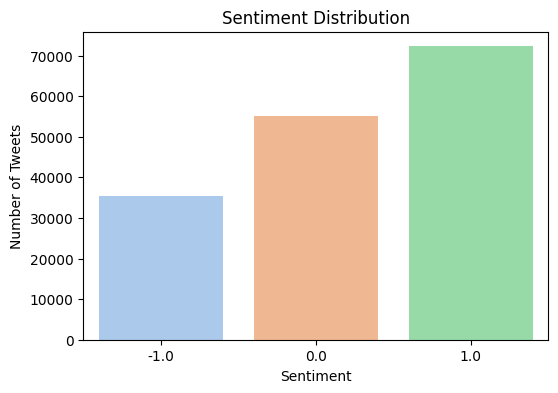

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


In [ ]:
# Number of tweets per sentiment
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Percentage of each sentiment
sentiment_percent = df['sentiment'].value_counts(normalize=True) * 100
print(sentiment_percent)


sentiment
positive    78092
negative    52195
neutral     32693
Name: count, dtype: int64
sentiment
positive    47.915082
negative    32.025402
neutral     20.059517
Name: proportion, dtype: float64


/tmp/ipython-input-3922326538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


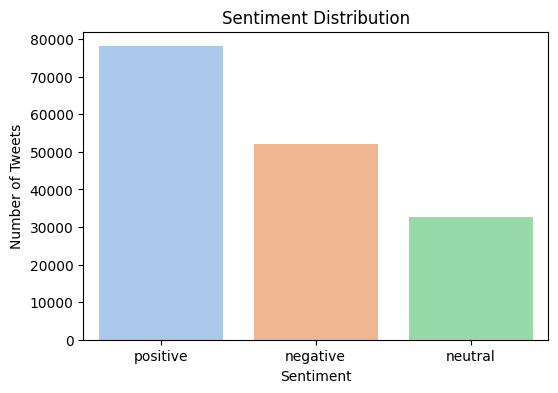

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


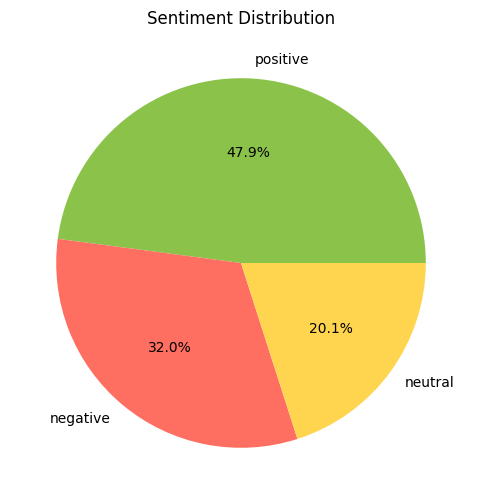

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#8BC34A','#FF6F61','#FFD54F'])
plt.title('Sentiment Distribution')
plt.show()


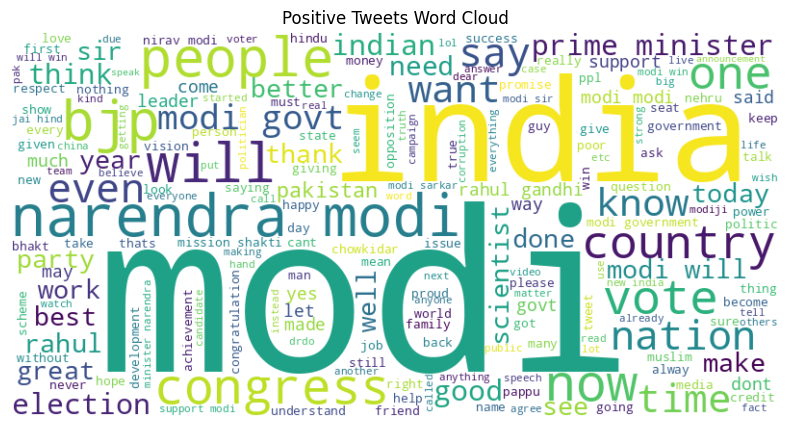

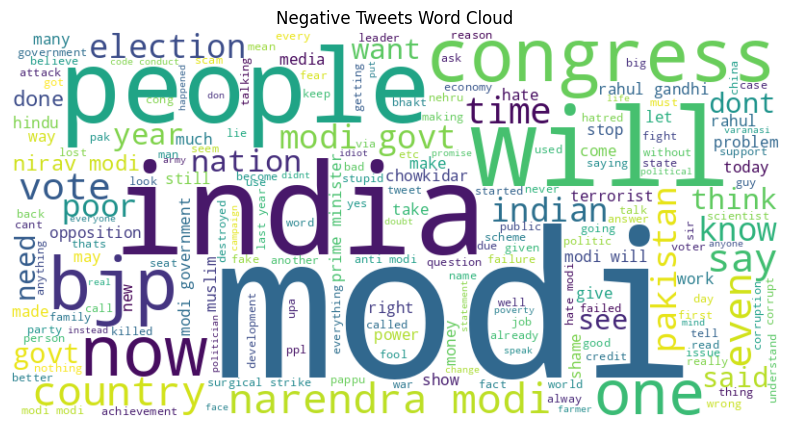

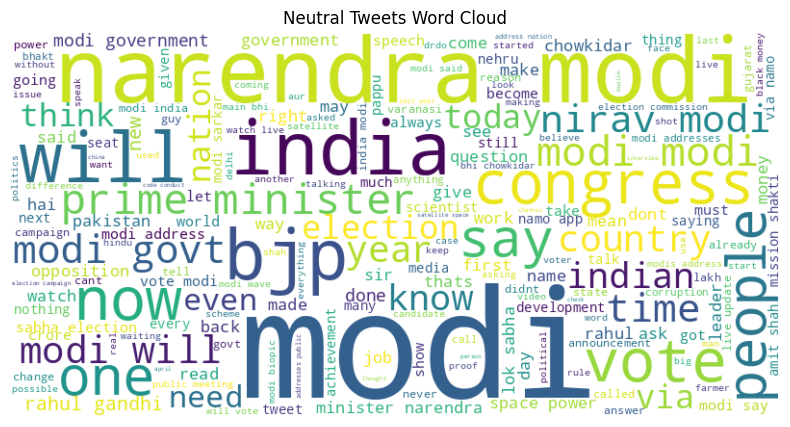

In [ ]:
from wordcloud import WordCloud

# Function to create word cloud for a sentiment
def generate_wordcloud(sentiment):
    text = " ".join(df[df['sentiment']==sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment.capitalize()} Tweets Word Cloud")
    plt.show()

generate_wordcloud('positive')
generate_wordcloud('negative')
generate_wordcloud('neutral')


In [ ]:
df.to_csv("twitter_sentiment_with_labels.csv", index=False)
